**Machine Learning And Neural Networks Tutorial**

**Recurrent Neural Network (RNN)**

This tutorial explains the diffrent types of RNNs and what are advantages and disadvantages of each RNN and why they are introduced

References

1.https://uk.mathworks.com/discovery/rnn.html

2 https://www.ibm.com/think/topics/recurrent-neural-networks

This Tutorial explains



*   Creation of Simple RNN, compiling and training it
*   Training of Simple RNN on sine wave data and predicting last 50 sine wave harmonics
*   Creation of LSTM, compiling and training it
*  Creation of GRU, compiling and training it

In [1]:
# import for data frame operations
import pandas as pd
# import for mathematical operations
import numpy as np
# import for plotting
import matplotlib.pyplot as plt
# import to perform machine learning tasks
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout, GRU
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.callbacks import Callback

In [2]:
# mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Recurrent Neural Network (RNN) has ability to remeber the input data and predict the future outputs/sequences.

RNN are used in text generation, flood detections, stock market analysis etc.

Lets build a simple RNN and cmpile and train it
commands needed to be used are


*   Building Model  - model.add(SimpleRNN(units, shape, activation function))
*   Compiling model - model.compile(optimizer, loss, metrics)
*   Training model  - model.fit(input, output, epochs, batch size)
*   To show summary - model.summary()

model that is build below has

simpleRNN - with units=10, input_shape=(5, 1), activation='relu'


Denselayer - 1, activation='sigmoid'

In [3]:
# Let's create a simple dataset
# 10 sequences, each of length 5, with 1 feature
X = np.random.rand(10, 5, 1)
y = np.random.randint(2, size=(10, 1))

# Createing a Sequential model
model = Sequential()

# Add a SimpleRNN layer
model.add(SimpleRNN(units=10, input_shape=(5, 1), activation='relu'))

# Add a Dense output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=5, batch_size=2)

# Print model summary to show architecture
model.summary()


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3264 - loss: 0.6799  
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7889 - loss: 0.6679
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7889 - loss: 0.6647 
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7681 - loss: 0.6750
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7889 - loss: 0.6622


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 395 (1.55 KB)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 264 (1.04 KB)

Due to Back Propagation in RNN they suffer with vanishing/exploding gradients problems. i.e thay forget the input after some time in case of vanishing gradients and the input is scaled so large than the original input in case of exploding gradients.

Let's generate a sine wave and use for training RNN with exploding gradients and predict the last 50 harmonics of sine wave using RNN.

Epoch 1/50
11/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6358 - mae: 0.7140Epoch 1: Learning Rate = 0.0010000000474974513
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6035 - mae: 0.6897
Epoch 2/50
11/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3909 - mae: 0.5228 Epoch 2: Learning Rate = 0.0010000000474974513
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3766 - mae: 0.5055
Epoch 3/50
12/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2534 - mae: 0.3778 Epoch 3: Learning Rate = 0.0010000000474974513
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2445 - mae: 0.3697
Epoch 4/50
12/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1628 - mae: 0.3061 Epoch 4: Learning Rate = 0.0010000000474974513
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1599 - mae: 0.3039
Epoch 5/50
12/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1190 - mae: 0.2764  Epoch 5: Learning Rate = 0.0010000000474974513
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1175 - mae: 0.2754
Epoch 6/50
11/16 ━━━━━━━━━━━━━

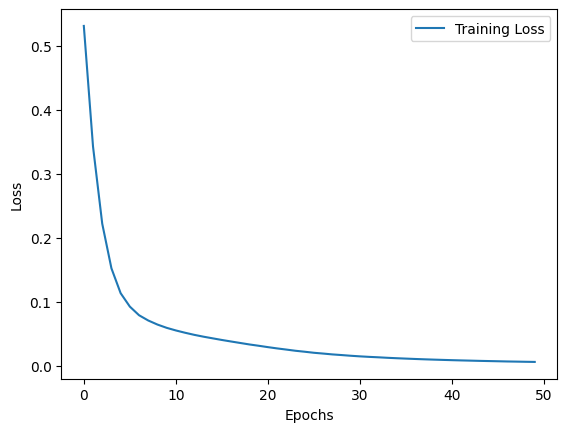

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


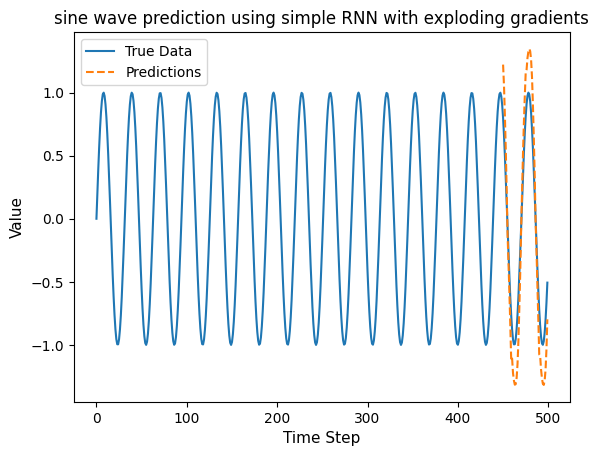

In [4]:
# Generate a simple sine wave as time series data
time_steps = np.linspace(0, 100, 500)
data = np.sin(time_steps)

# Prepare the dataset
def create_dataset(data, seq_length=10):
    # creating two lists
    X, y = [], []

    for i in range(len(data) - seq_length):
        # Input sequence of 10 time steps
        X.append(data[i:i + seq_length])

        # Next time step value as target
        y.append(data[i + seq_length])

    return np.array(X), np.array(y)

# Create the dataset with time series data
X, y = create_dataset(data)

# Reshape X to match the input shape (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Normalize the data
X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

# Create an RNN model with a large weight initialization
model = Sequential()

# Add a SimpleRNN layer with a large weight initializer
model.add(SimpleRNN(units=10, activation='tanh', input_shape=(X.shape[1], 1),
                    kernel_initializer=RandomNormal(mean=0.0, stddev=5.0)))

# Add a Dense output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])

# Callback to print the learning rate
class LearningRateLogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        current_lr = self.model.optimizer.learning_rate.numpy()
        print(f"Epoch {epoch+1}: Learning Rate = {current_lr}")

# Train the model and observe exploding gradients (during backpropagation)
history = model.fit(X, y, epochs=50, batch_size=32, verbose=1, callbacks=[LearningRateLogger()])

# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')

# adding x axis label
plt.xlabel('Epochs')

# adding y axis label
plt.ylabel('Loss')

# adding legend
plt.legend()

# show plot
plt.show()

# Predict the next 50 time steps
predictions = model.predict(X[-50:])

# Plot the predictions along with the true values
plt.plot(range(len(data)), data, label='True Data')
plt.plot(range(len(data)-50, len(data)), predictions, label='Predictions', linestyle='dashed')

# adding x axis label
plt.xlabel('Time Step', fontsize = 11)

# adding y axis label
plt.ylabel('Value', fontsize = 11)

# adding title to plot
plt.title('sine wave prediction using simple RNN with exploding gradients', fontsize = 12)

# adding legend and setting location
plt.legend(loc = 'upper left')

# show plot
plt.show()

Let's create RNN with vanishing gradients and train it with sine wave as sequential data and predict the outputs.

Epoch 1/50
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8718 - mae: 0.8207Epoch 1: Learning Rate = 0.0010000000474974513
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.8594 - mae: 0.8154
Epoch 2/50
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.5239 - mae: 0.6583Epoch 2: Learning Rate = 0.0010000000474974513
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4509 - mae: 0.6135 
Epoch 3/50
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2575 - mae: 0.4718Epoch 3: Learning Rate = 0.0010000000474974513
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2108 - mae: 0.4218 
Epoch 4/50
 1/16 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.1428 - mae: 0.3429Epoch 4: Learning Rate = 0.0010000000474974513
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0846 - mae: 0.2549 
Epoch 5/50
 1/16 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0344 - mae: 0.1510Epoch 5: Learning Rate = 0.0010000000474974513
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0289 - mae: 0.1409 
Epoch 6/50
 1/16 ━━━━━━━━━━

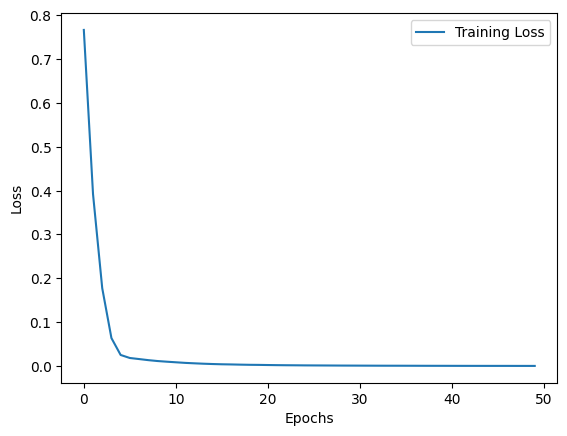

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


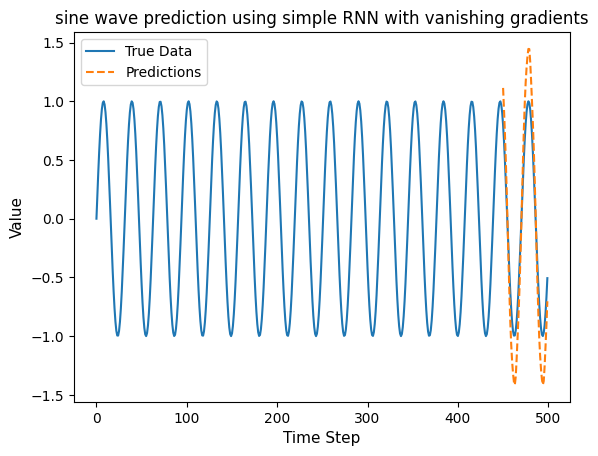

In [5]:
# Create an RNN model
model = Sequential()

# Add a SimpleRNN layer with a large weight initializer
model.add(SimpleRNN(units=10, activation='tanh', input_shape=(X.shape[1], 1),
                    kernel_initializer=RandomNormal(mean=0.0, stddev=0.1)))

# Add a Dense output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])

# Callback to print the learning rate
class LearningRateLogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        current_lr = self.model.optimizer.learning_rate.numpy()
        print(f"Epoch {epoch+1}: Learning Rate = {current_lr}")

# Train the model and observe exploding gradients (during backpropagation)
history = model.fit(X, y, epochs=50, batch_size=32, verbose=1, callbacks=[LearningRateLogger()])

# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')

# adding x axis label
plt.xlabel('Epochs')

# adding y axis label
plt.ylabel('Loss')

# adding legend
plt.legend()

# show figure
plt.show()

# Predict the next 50 time steps
predictions = model.predict(X[-50:])

# Plot the predictions along with the true values
plt.plot(range(len(data)), data, label='True Data')
plt.plot(range(len(data)-50, len(data)), predictions, label='Predictions', linestyle='dashed')

# adding x axis label
plt.xlabel('Time Step', fontsize = 11)

# adding y axis label
plt.ylabel('Value', fontsize = 11)

# Giving title to plot
plt.title('sine wave prediction using simple RNN with vanishing gradients', fontsize = 12)

# adding legend to plot and adjusting location
plt.legend(loc = 'upper left')

# show the plot
plt.show()

LSTM solves the problem of Exploding/vanishing gradients by using gates due to thi gates parts of input selectevly selected and stored so that it can be used for prediction.

Let's create a LSTM network with exploding gradients and train it using sine wave data and predict the last 50 harmonics of sine wave.

Epoch 1/50
12/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2817 - mae: 1.0154Epoch 1: Learning Rate = 0.0010000000474974513
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.2491 - mae: 1.0019
Epoch 2/50
12/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1044 - mae: 0.9339Epoch 2: Learning Rate = 0.0010000000474974513
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0835 - mae: 0.9248
Epoch 3/50
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0057 - mae: 0.8960Epoch 3: Learning Rate = 0.0010000000474974513
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9934 - mae: 0.8891
Epoch 4/50
 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8036 - mae: 0.7753  Epoch 4: Learning Rate = 0.0010000000474974513
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7952 - mae: 0.7749
Epoch 5/50
 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7495 - mae: 0.7635  Epoch 5: Learning Rate = 0.0010000000474974513
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7220 - mae: 0.7476
Epoch 6/50
15/16 ━━━━━━━━━━━━━

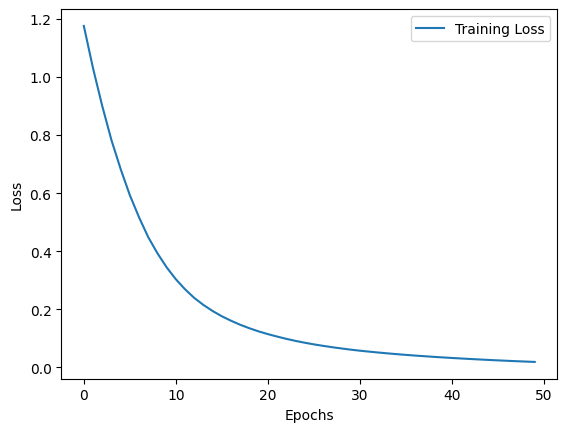

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


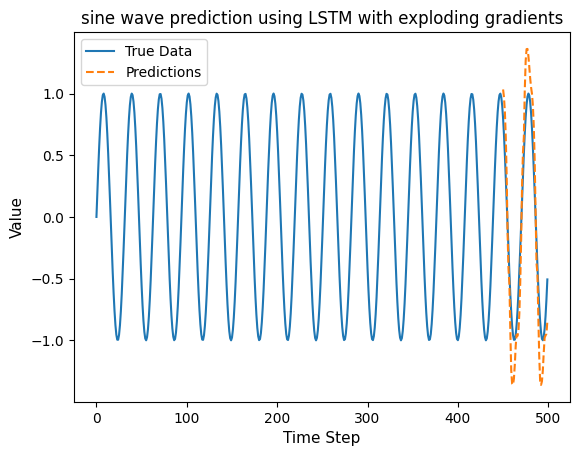

In [6]:
# Create an RNN model
model = Sequential()

# Add a LSTM layer with a large weight initializer
model.add(LSTM(units=10, activation='tanh', input_shape=(X.shape[1], 1),
               kernel_initializer=RandomNormal(mean=0.0, stddev=5.0)))

# Add a Dense output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])

# Callback to print the learning rate
class LearningRateLogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        current_lr = self.model.optimizer.learning_rate.numpy()
        print(f"Epoch {epoch+1}: Learning Rate = {current_lr}")

# Train the model and observe exploding gradients (during backpropagation)
history = model.fit(X, y, epochs=50, batch_size=32, verbose=1, callbacks=[LearningRateLogger()])

# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')

# labeling x axis
plt.xlabel('Epochs')

# labeling y axis
plt.ylabel('Loss')

# adding legend to plot
plt.legend()

# show plot
plt.show()

# Predict the next 50 time steps
predictions = model.predict(X[-50:])

# Plot the predictions along with the true values
plt.plot(range(len(data)), data, label='True Data')
plt.plot(range(len(data)-50, len(data)), predictions, label='Predictions', linestyle='dashed')

# labeling x axis
plt.xlabel('Time Step', fontsize = 11)

# labeling y axis
plt.ylabel('Value', fontsize = 11)

# adding title to plot
plt.title('sine wave prediction using LSTM with exploding gradients', fontsize = 12)

# adding legend
plt.legend()

# show plot
plt.show()

Let's create a LSTM network with vanishing gradients and train it using sine wave data and predict the last 50 harmonics of sine wave.

Epoch 1/50
12/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0758 - mae: 0.9347Epoch 1: Learning Rate = 0.0010000000474974513
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.0705 - mae: 0.9326
Epoch 2/50
12/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9762 - mae: 0.8958 Epoch 2: Learning Rate = 0.0010000000474974513
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9723 - mae: 0.8926
Epoch 3/50
10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9555 - mae: 0.8964 Epoch 3: Learning Rate = 0.0010000000474974513
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9269 - mae: 0.8776
Epoch 4/50
12/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8369 - mae: 0.8313  Epoch 4: Learning Rate = 0.0010000000474974513
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8263 - mae: 0.8247
Epoch 5/50
10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7599 - mae: 0.7830 Epoch 5: Learning Rate = 0.0010000000474974513
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7456 - mae: 0.7766
Epoch 6/50
12/16 ━━━━━━━━━━━━━

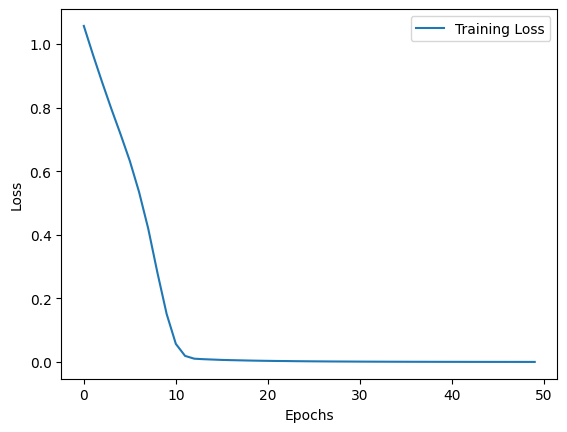

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


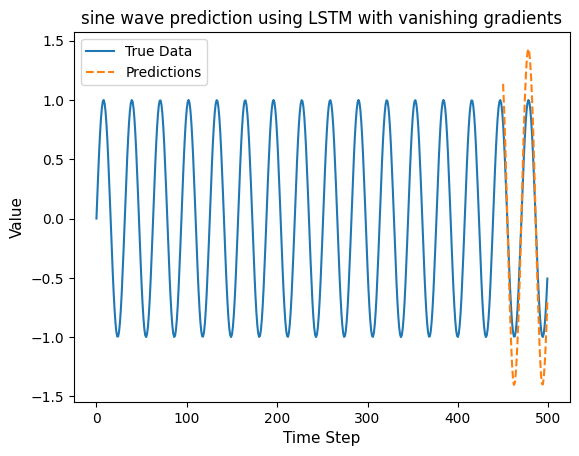

In [7]:
# Create an RNN model
model = Sequential()

# Add a LSTM layer
model.add(LSTM(units=10, activation='tanh', input_shape=(X.shape[1], 1),
               kernel_initializer=RandomNormal(mean=0.0, stddev=0.1)))

# Add a Dense output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])

# Callback to print the learning rate
class LearningRateLogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        current_lr = self.model.optimizer.learning_rate.numpy()
        print(f"Epoch {epoch+1}: Learning Rate = {current_lr}")

# Train the model and observe vanishing gradients (during backpropagation)
history = model.fit(X, y, epochs=50, batch_size=32, verbose=1, callbacks=[LearningRateLogger()])

# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')

# labeling x axis
plt.xlabel('Epochs')

# labeling y axis
plt.ylabel('Loss')

# adding legend
plt.legend()

# show plot
plt.show()

# Predict the next 50 time steps
predictions = model.predict(X[-50:])

# Plot the predictions along with the true values
plt.plot(range(len(data)), data, label='True Data')
plt.plot(range(len(data)-50, len(data)), predictions, label='Predictions', linestyle='dashed')

# adding x axis label
plt.xlabel('Time Step', fontsize = 11)

# adding y axis label
plt.ylabel('Value', fontsize = 11)

# adding title to plot
plt.title('sine wave prediction using LSTM with vanishing gradients', fontsize = 12)

# adding legend
plt.legend()

# show plot
plt.show()

It can be observed that losses are very smoother than compared to simple RNN this is the advantage of LSTM compared to simpleRNN.

Now let's analyze the SimpleRNN loss on dataset.

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0087
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9847
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9710
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9696
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9078
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9756
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8670
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9290
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0340
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1273
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0080
Epoch 12/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9586
Epoch 13/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8918
Epoch 14/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9677
Epoch 15/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9860
Epoch 16/50
48/48 ━━━━━━━━━━━━

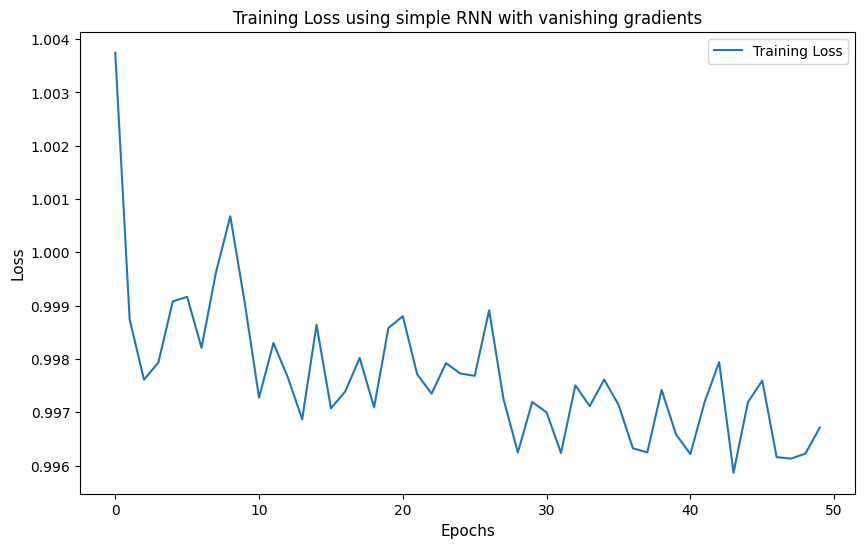

In [8]:
# Load data
df = pd.read_csv("/content/drive/MyDrive/Microsoft_Stock.csv")

# Preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Using feature 'High' to predict 'Volume'
features = df[['High']]
target = df['Volume']

# converting to numpy array
X = np.array(features)
y = np.array(target)

# Reshaping X to 3D array (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Normalizing the data (Z-score normalization)
X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

# Step 4: Build the SimpleRNN model
model = Sequential()

# Adding SimpleRNN layer instead of LSTM
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(X.shape[1], 1), kernel_initializer=RandomNormal(mean=0.0, stddev=0.1)))

# Adding output layer
model.add(Dense(1))

# Compile the model with a smaller learning rate
model.compile(optimizer=Adam(), loss='mse')

# Train the model
history = model.fit(X, y, epochs=50, batch_size=32)

# Plot training loss
plt.figure(figsize=(10, 6))

# plotting loss
plt.plot(history.history['loss'], label='Training Loss')

# adding title to plot
plt.title('Training Loss using simple RNN with vanishing gradients', fontsize = 12)

# adding x axis label
plt.xlabel('Epochs', fontsize = 11)

# adding y axis label
plt.ylabel('Loss', fontsize = 11)

# adding legend
plt.legend()

# show plot
plt.show()

Lets build LSTM network with vanishing gradients and train LSTM with this data and observe losses.

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9825
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9530
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8996
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0555
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9990
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2042
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9378
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9729
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0824
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9948
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0610
Epoch 12/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9206
Epoch 13/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9553
Epoch 14/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9346
Epoch 15/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9481
Epoch 16/50
48/48 ━

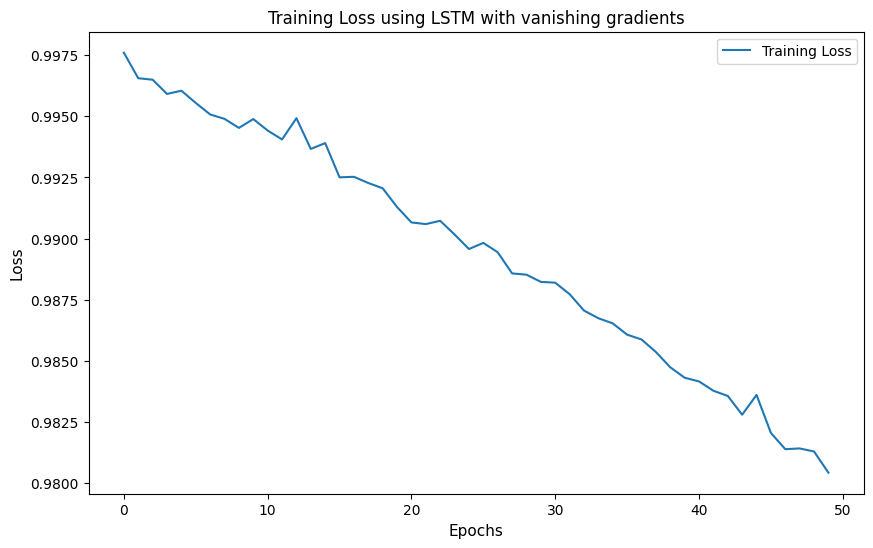

In [9]:
# Build the LSTM model
model = Sequential()

# Adding LSTM layer
model.add(LSTM(units=50, activation='tanh', input_shape=(X.shape[1], 1), kernel_initializer=RandomNormal(mean=0.0, stddev=0.1)))

# Adding output layer
model.add(Dense(1))

# Compile the model with a smaller learning rate
model.compile(optimizer=Adam(), loss='mse')

# Train the model
history = model.fit(X, y, epochs=50, batch_size=32)

# Plot training and validation loss
plt.figure(figsize=(10, 6))

# plot the loss
plt.plot(history.history['loss'], label='Training Loss')

# add title to plot
plt.title('Training Loss using LSTM with vanishing gradients', fontsize = 12)

# add x axis label
plt.xlabel('Epochs', fontsize = 11)

# add y axis label
plt.ylabel('Loss', fontsize = 11)

# add legend to plot
plt.legend()

# show plot
plt.show()

Lets build SimpleRNN network with explodig gradients and train it with this data and observe losses.

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.9383
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0650
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9471
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9971
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0004
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0591
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9880
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9599
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0104
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0868
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9869
Epoch 12/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0398
Epoch 13/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8856
Epoch 14/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9659
Epoch 15/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9599
Epoch 16/50
48/48 ━

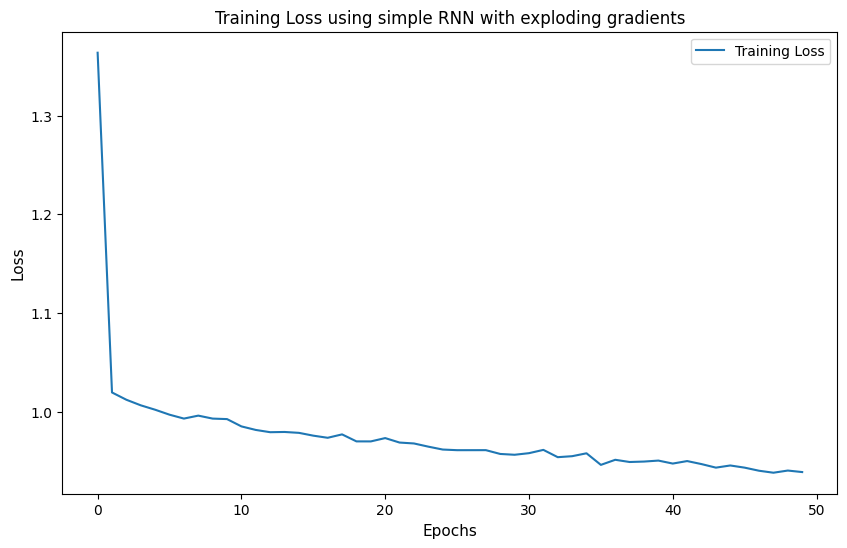

In [10]:
# Build the SimpleRNN model
model = Sequential()

# Adding SimpleRNN layer
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(X.shape[1], 1), kernel_initializer=RandomNormal(mean=0.0, stddev=5.0)))

# Adding output layer
model.add(Dense(1))

# Compile the model with a smaller learning rate
model.compile(optimizer=Adam(), loss='mse')

# Step 5: Train the model
history = model.fit(X, y, epochs=50, batch_size=32)

# Step 6: Plot training loss
plt.figure(figsize=(10, 6))

# plot the loss
plt.plot(history.history['loss'], label='Training Loss')

# add title to plot
plt.title('Training Loss using simple RNN with exploding gradients', fontsize = 12)

# add x axis label
plt.xlabel('Epochs', fontsize = 11)

# add y axis label
plt.ylabel('Loss', fontsize = 11)

# add legend
plt.legend()

# show plot
plt.show()

Let's create a LSTM network with exploding gradients and train it with this dataset and observe loss.

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.1024
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0448
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9487
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8325
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0897
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9746
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9887
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9367
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9983
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9402
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0259
Epoch 12/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9232
Epoch 13/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9245
Epoch 14/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8731
Epoch 15/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0167
Epoch 16/50
48/48 ━

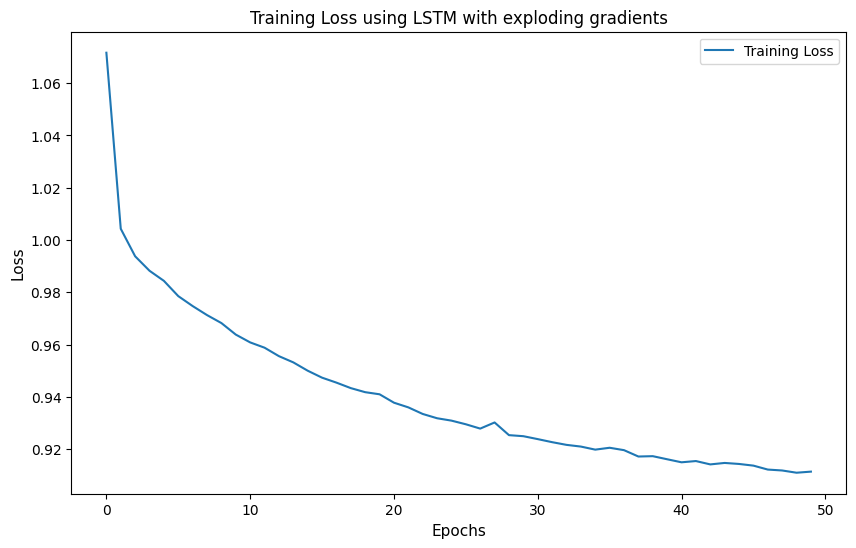

In [11]:
# Build the LSTM model
model = Sequential()

# Adding LSTM layer
model.add(LSTM(units=50, activation='tanh', input_shape=(X.shape[1], 1), kernel_initializer=RandomNormal(mean=0.0, stddev=5.0)))

# Adding output layer
model.add(Dense(1))

# Compile the model with a smaller learning rate
model.compile(optimizer=Adam(), loss='mse')

# Train the model
history = model.fit(X, y, epochs=50, batch_size=32)

# Plot training and validation loss
plt.figure(figsize=(10, 6))

# plot the loss
plt.plot(history.history['loss'], label='Training Loss')

# add title to plot
plt.title('Training Loss using LSTM with exploding gradients', fontsize = 12)

# add x axis label
plt.xlabel('Epochs', fontsize = 11)

# add y axis label
plt.ylabel('Loss', fontsize = 11)

# add legend to plot
plt.legend()

# show plot
plt.show()

It can be observed that the losses after using LSTM are more smoother than with simple RNN.

Although LSTM solves the problem of vanishing/exploding gradients but it need lot of architecture and computational effort and becomes vey slow while training large sequential datasets.

That's why GRUs are invented which have siple architecture and can be trained faster than LSTM.

Let's create a GRU network and train it with this dataset and observe loss

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8696
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9575
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9588
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8918
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0594
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0845
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0910
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0686
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8727
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9336
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9114
Epoch 12/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0246
Epoch 13/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0612
Epoch 14/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9503
Epoch 15/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1546
Epoch 16/50
48/48 ━

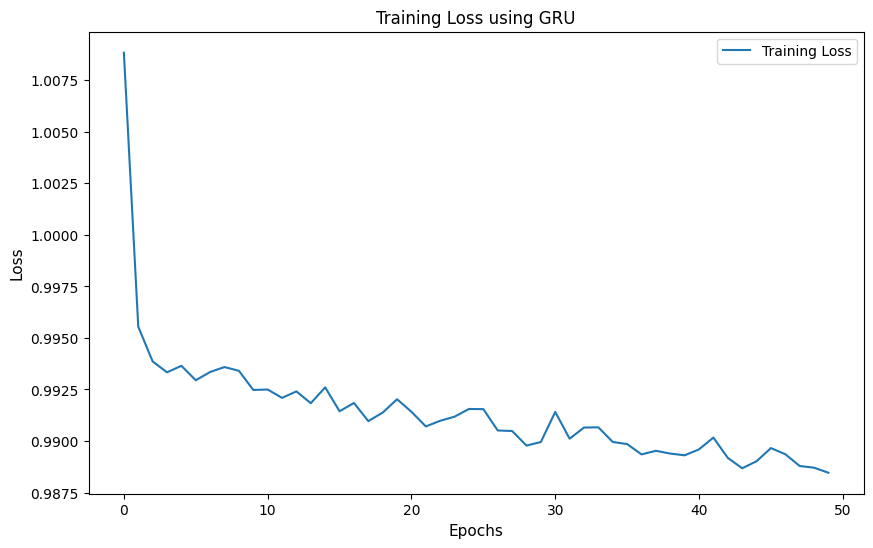

In [12]:
# Step 4: Build the GRU model
model = Sequential()

# Adding GRU layer instead of SimpleRNN
model.add(GRU(units=20, activation='tanh', input_shape=(X.shape[1], 1)))

# Adding output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(), loss='mse')

# Train the model
history = model.fit(X, y, epochs=50, batch_size=32)

# Plot training loss
plt.figure(figsize=(10, 6))

# plotting loss
plt.plot(history.history['loss'], label='Training Loss')

# adding title to plot
plt.title('Training Loss using GRU', fontsize=12)

# adding x axis label
plt.xlabel('Epochs', fontsize=11)

# adding y axis label
plt.ylabel('Loss', fontsize=11)

# adding legend
plt.legend()

# show plot
plt.show()